In [1]:
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
import time

from ActionController import ActionController

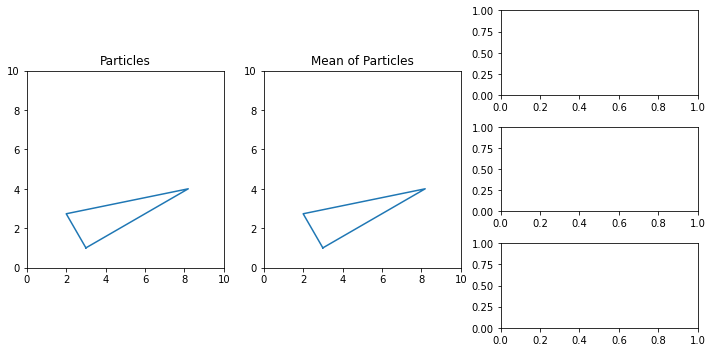

In [2]:
# World
# shape = Polygon([[0, 0], [6, 0], [6, 1],[0, 1], [0, 0]]) # rectangle
shape = Polygon([[0, 0], [6, 0], [0, 2], [0, 0]]) # triangle
x = 3
y = 1
theta = np.pi/6
map_size = 10, 10

# ParticleFilter
num_particles = 500
lookahead_depth = 1

action_controller = ActionController(
    shape, x, y, theta, map_size, 
    num_particles, lookahead_depth, 
)

# Simulation
num_iterations = 500
entropies = []
total_iterations = 0

# Visuals

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])

action_controller.world.plot(ax1)
action_controller.world.plot(ax2)
ax1.set_title('Particles')
ax2.set_title('Mean of Particles')
fig.tight_layout()

In [9]:
%%time

# Run
for iteration in range(num_iterations and 10):
        
    action_controller.tick()
    entropies.append(action_controller.particle_filter.get_entropy())
    
#     s = ax1.scatter(*action_controller.previous_action, c='r')
#     q = action_controller.particle_filter.draw_particles(ax1)
#     ax3.clear(); ax4.clear(); ax5.clear();
#     h1, h2, h3 = action_controller.particle_filter.draw_histogram(ax3, ax4, ax5)

#     x,y,t = action_controller.particle_filter.get_state() # access estimated state
#     q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
#     display.display(fig)
#     if iteration % 20 == 0:    
#         time.sleep(5)
#     display.clear_output(wait=True)
    
#     if 0 < iteration < num_iterations - 1:
#         q.remove()
#         s.remove()

    print(f"iteration: {iteration}")
#     break
    

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
CPU times: user 1min 42s, sys: 62.5 ms, total: 1min 42s
Wall time: 1min 44s


iteration: 9


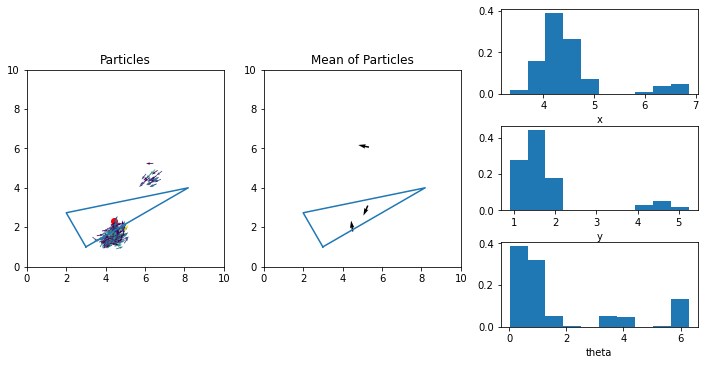

In [10]:
total_iterations += iteration + 1
print(f"iteration: {iteration}")

s = ax1.scatter(*action_controller.previous_action, c='r')
q = action_controller.particle_filter.draw_particles(ax1)
ax3.clear(); ax4.clear(); ax5.clear();
h1, h2, h3 = action_controller.particle_filter.draw_histogram(ax3, ax4, ax5)

x,y,t = action_controller.particle_filter.get_state() # access estimated state
q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
display.display(fig)

q.remove()
s.remove()

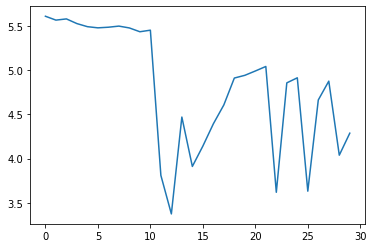

In [11]:
plt.plot(entropies)

In [ ]:


# Repeatedly update the particle filter, measuring at user-defined locations.
while(True):
    # select random measurement
    try:
        x,y = tuple(float(x.strip()) for x in input("X,Y coordinate to measure:").split(','))
    except ValueError as e:
        print(e)
        continue
        
    # update particle filter with measurement
    z = w.measure(x, y)
    pf.update(z)
    
    # Plot
    s = ax1.scatter(z[0], z[1], c='r')
    q = pf.draw_particles(ax1)
    ax3.clear(); ax4.clear(); ax5.clear();
    h1, h2, h3 = pf.draw_histogram(ax3, ax4, ax5)
    
    x,y,t = pf.get_state() # access estimated state
    q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
    display.display(fig)
    display.clear_output(wait=True)

    q.remove()
    s.remove()

# Tim's work below

In [1]:
# particle_filter_example.ipynb
# February 16, 2021
# Tim Player playert@oregonstate.edu

In [8]:
from shapely.geometry import Point, Polygon
from StateEstimator import ParticleFilter
from World import World
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from IPython import display
import time

### Define a 2D World containing an object.

In [9]:
# Define the shape, location, and angle of the object.
shape = Polygon([[0, 0], [6, 0], [6, 1],[0, 1], [0, 0]])
x = 1
y = 1
theta = np.pi/6

# Create a World object to store the map and do measurements.
map_size = (10,10) 
w = World(shape, x, y, theta, map_size)

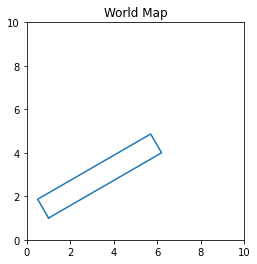

In [10]:
fig, ax = plt.subplots()
w.plot(ax)

### Run particle filter, measuring randomly

In [11]:
# Make a particle  filter
n = 500 # run for n steps.
pf = ParticleFilter(shape, 1000, map_size)

# Set up two plots
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])

w.plot(ax1)
w.plot(ax2)
ax1.set_title('Particles')
ax2.set_title('Mean of Particles')
fig.tight_layout()

# Repeatedly update the particle filter, measuring randomly.
for i in range(n):
    # select random measurement
    x = np.random.uniform(0,map_size[0])
    y = np.random.uniform(0,map_size[1])
    
    # update particle filter with measurement
    z = w.measure(x, y)
    pf.update(z)
    
    # Plot
    s = ax1.scatter(z[0], z[1], c='r')
    q = pf.draw_particles(ax1)
    ax3.clear(); ax4.clear(); ax5.clear();
    h1, h2, h3 = pf.draw_histogram(ax3, ax4, ax5)
    
    x,y,t = pf.get_state() # access estimated state
    q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
    display.display(fig)
    display.clear_output(wait=True)
    if i != n-1:
        q.remove()
        s.remove()

KeyboardInterrupt: 

IndexError: list index out of range

<Figure size 720x360 with 5 Axes>

### Run particle filter, prompting user for input

X,Y coordinate to measure: 2,2


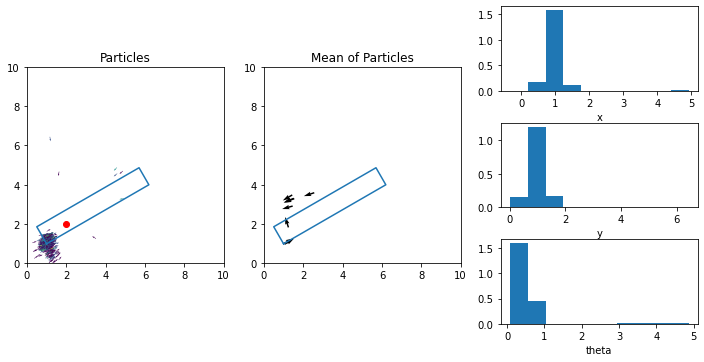

In [ ]:
# Make a particle  filter
pf = ParticleFilter(shape, 1000, map_size)

# Set up two plots
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])

w.plot(ax1)
w.plot(ax2)
ax1.set_title('Particles')
ax2.set_title('Mean of Particles')
fig.tight_layout()

# Repeatedly update the particle filter, measuring at user-defined locations.
while(True):
    # select random measurement
    try:
        x,y = tuple(float(x.strip()) for x in input("X,Y coordinate to measure:").split(','))
    except ValueError as e:
        print(e)
        continue
        
    # update particle filter with measurement
    z = w.measure(x, y)
    pf.update(z)
    
    # Plot
    s = ax1.scatter(z[0], z[1], c='r')
    q = pf.draw_particles(ax1)
    ax3.clear(); ax4.clear(); ax5.clear();
    h1, h2, h3 = pf.draw_histogram(ax3, ax4, ax5)
    
    x,y,t = pf.get_state() # access estimated state
    q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
    display.display(fig)
    display.clear_output(wait=True)

    q.remove()
    s.remove()